<figure>
  <IMG SRC="https://raw.githubusercontent.com/pastas/pastas/master/doc/_static/Art_logo.jpg" WIDTH=250 ALIGN="right">
</figure>

# Simulating groundwater levels with a surface water level
*Developed by Raoul Collenteur*

In this example it is shown how to create a time series model with not only evaporation and precipitation, but also including surface water levels. The following data is used:

- groundwater.csv: groundwaterlevels
- rain.csv: Precipitation
- evap.csv: Potential evaporation
- waterlevel.csv: Surface waterlevel

In [1]:
import pandas as pd
import pastas as ps
import matplotlib.pyplot as plt

%matplotlib notebook

### 1. import and plot the data

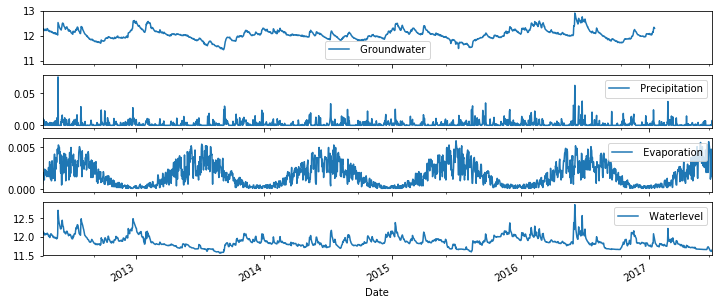

In [2]:
oseries = pd.read_csv("data_notebook_5/groundwater.csv", parse_dates=True, squeeze=True, index_col=0)
rain = pd.read_csv("data_notebook_5/rain.csv", parse_dates=True, squeeze=True, index_col=0)
evap = pd.read_csv("data_notebook_5/evap.csv", parse_dates=True, squeeze=True, index_col=0)
waterlevel = pd.read_csv("data_notebook_5/waterlevel.csv", parse_dates=True, squeeze=True, index_col=0)

fig, axes = plt.subplots(4,1, figsize=(12, 5), sharex=True)
oseries.plot(ax=axes[0], x_compat=True, legend=True)
rain.plot(ax=axes[1], x_compat=True, legend=True)
evap.plot(ax=axes[2], x_compat=True, legend=True)
waterlevel.plot(ax=axes[3], x_compat=True, legend=True)


### 2. Create a timeseries model


INFO: Cannot determine frequency of series  Groundwater
INFO: Time Series  Groundwater: 5 nan-value(s) was/were found and filled with: drop
INFO: Inferred frequency from time series  Precipitation: freq=D 
INFO: Inferred frequency from time series  Evaporation: freq=D 


Model Results  Groundwater          Fit Statistics
nfev     40                     EVP          60.95
nobs     2412                   R2            0.61
noise    True                   RMSE          0.14
tmin     2000-01-01 00:00:00    AIC          10.27
tmax     2017-01-16 00:00:00    BIC          45.00
freq     D                      ___               
warmup   3650 days 00:00:00     ___               
solver   LeastSquares           ___               

Parameters (6 were optimized)
                optimal   stderr     initial  vary
recharge_A   340.402004   ±9.90%  203.104730  True
recharge_n     1.026769   ±1.18%    1.000000  True
recharge_a    64.078837  ±10.67%   10.000000  True
recharge_f    -0.621992  ±10.25%   -1.000000  True
constant_d    11.623633   ±0.59%   12.026835  True
noise_alpha   54.996583  ±15.31%    1.000000  True

Parameter correlations |rho| > 0.5
recharge_A recharge_a  0.88
           recharge_f  0.55
           constant_d -0.86
recharge_a constant_d -0.70
recha

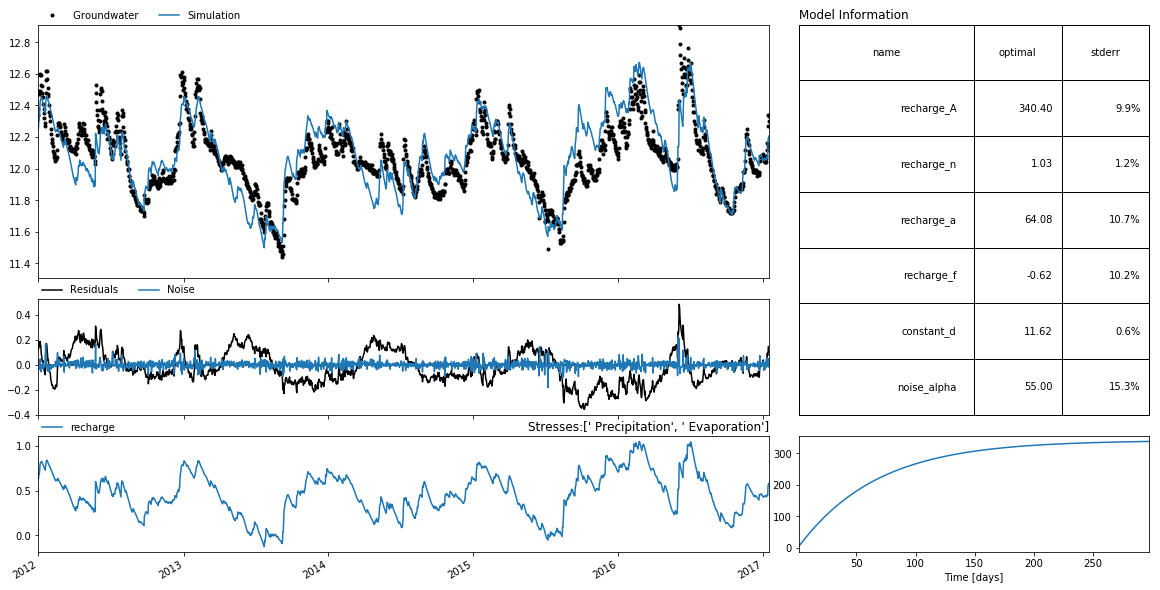

In [3]:
ml = ps.Model(oseries)

sm = ps.StressModel2([rain, evap], rfunc=ps.Gamma, name="recharge")
ml.add_stressmodel(sm)

ml.solve(tmin="2000")
ml.plots.results(tmin="2012", figsize=(16, 8))
print("The explained variance percentage over the period 2012-2017 is: %s" % ml.stats.evp(tmin="2012"))

### 3. Adding surface water level

In [4]:
w = ps.StressModel(waterlevel, rfunc=ps.Exponential,  name="waterlevel", settings="waterlevel")

# Normalize the stress by the mean such that only the variation in the waterlevel matters
w.update_stress(norm="mean")

ml.add_stressmodel(w)
ml.solve(tmin="2012")

INFO: Cannot determine frequency of series  Waterlevel
INFO: Time Series  Waterlevel was sampled down to freq D with method timestep_weighted_resample
INFO: Time Series  Waterlevel was sampled down to freq D with method timestep_weighted_resample


Model Results  Groundwater          Fit Statistics
nfev     45                     EVP          53.64
nobs     1843                   R2            0.54
noise    True                   RMSE          0.15
tmin     2012-01-01 00:00:00    AIC          15.87
tmax     2017-01-16 00:00:00    BIC          60.03
freq     D                      ___               
warmup   3650 days 00:00:00     ___               
solver   LeastSquares           ___               

Parameters (8 were optimized)
                optimal   stderr     initial  vary
recharge_A    85.992300  ±11.56%  203.104730  True
recharge_n     1.318230   ±2.71%    1.000000  True
recharge_a    14.907173  ±12.76%   10.000000  True
recharge_f    -0.200036  ±86.37%   -1.000000  True
waterlevel_A   0.493345   ±4.68%    6.401099  True
waterlevel_a   0.574237   ±9.30%   10.000000  True
constant_d    11.880729   ±0.42%   12.026835  True
noise_alpha   82.618817  ±27.13%    1.000000  True

Parameter correlations |rho| > 0.5
recharge_A   re

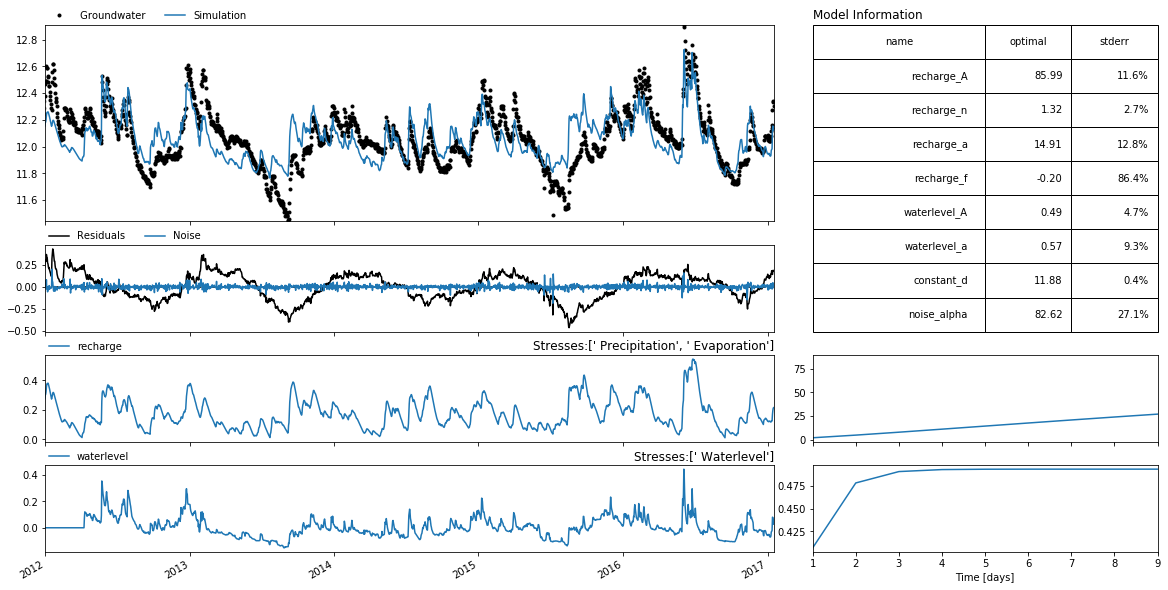

In [5]:
ml.plots.results(figsize=(16, 8))